In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [7]:
# Load Dataset
df = pd.read_csv("Housing.csv")

# Step 1: Data Preprocessing
# Convert categorical variables into numerical format if necessary
df = pd.get_dummies(df, drop_first=True)
df

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,True,False,True,False,False,False,False,True
541,1767150,2400,3,1,1,0,False,False,False,False,False,False,True,False
542,1750000,3620,2,1,1,0,True,False,False,False,False,False,False,True
543,1750000,2910,3,1,1,0,False,False,False,False,False,False,False,False


In [9]:
# Step 2: Define Features and Target
X = df.drop(columns=['price'])  # Assuming 'price' is the target variable
y = df['price']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Step 4: Training the Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Predictions
y_pred = model.predict(X_test)

In [17]:
#Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R2 Score:", r2)

Mean Absolute Error: 970043.403920164
Mean Squared Error: 1754318687330.6643
Root Mean Squared Error: 1324506.9600914388
R2 Score: 0.6529242642153184


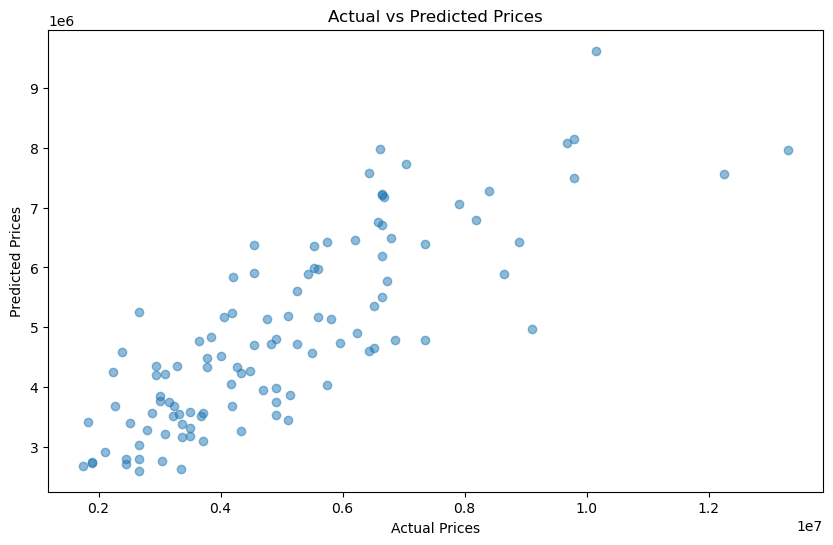

In [19]:
# Step 7: Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()